# Probability (Continuous)

In [2]:
# Import some helper functions (please ignore this!)
from utils import * 

**Context:** Many real-world data sets include non-discrete values (e.g. a patient's body-mass index (BMI), the dosage of medicine, and more). Here, we will introduce what you need to know in order to model continuous-valued data. 

**Challenge:** In many ways, continuous probability is similar to discrete probability. However, there are a few "gotchas" that are important to highlight. 

**Outline:**
* Introduce and practice the concepts, terminology, and notation behind continuous probability distributions.
* Gain familiarity with several common continuous distributions.

## Differences Between Continuous and Discrete Probability

Continuous probability functions the same way as discrete probability, except for a few key differences.

**Sample Space of Support:** The support of continuous probability distributions is over "uncountably infinite sets." If you're not familiar with this term, that's ok! In this course, we'll think about it more as a distribution supported over the real numbers, $\mathbb{R}$ (or some subset thereof). 
> Example: Let $H$ be a continuous RV, describing the distribution of heights in the IHH ER. The support of $H$ is the interval $(0, \infty)$ on the real line. 

**Probability Mass Function (PMF):** Continuous probability distributions *DO NOT have PMFs*; this is because, unlike discrete distributions, we cannot think of continuous distributions in terms of frequency. Let's illustrate this with an example.
> Example: Suppose we are modeling the probability of intoxication as a Bernoulli RV, $I$. If we say that the probability of intoxication (or $I=1$) is $0.5$ (meaning $p_I(1) = 0.5$), meaning half of our patients will have intoxication. Such a statement about the PMF of a discrete distribution can be immediately translated into intuition about frequency. On the other hand, suppose we have a continuous RV, $H$, modeling the height of patients. How can we describe the probability that a patient is 50 inches tall (i.e. what is $p_H(50)$?). Let's try to get some intuition. Of the patients in the data, maybe we have one that's $50.1$ inches tall, another that is $49.9$, or maybe one that's $49.999991$ inches tall---but what are the chances we will observe a patient that is *exactly* (not approximately) $50$ inches tall? The answer is: zero. This is because of the arbitrary precision we have on continuous values. So if we can't describe continuous distributions using PMFs, how else can we describe them? As you will see next, we will have to use a more circuitous route.

```{admonition} Exercise: Why continuous distributions do not have PMFs
Demonstrate empirically that continuous distributions do not have valid PMFs via the following procedure:
1. Sample 10,000 values from a Uniform distribution on the range $[0, 1]$ (using `NumPyro`). This will draw samples on the range $[0, 1]$ with equal probability. 
2. Count the number of samples that exactly equal $0.5$. How 
```

**Cumulative Density Function (CDF):** As we showed, we can't use the frequency of a continuous RV as its probability. But we *can* ask a different question: what's the probability that a continuous RV is smaller than or equal to some value. This is called the CDF, which we will denote using $F$. What's interesting about the CDF is that it abides by our intuition of probability as frequencies; we can empirically estimate the CDF by counting all samples for which the variable is $\leq$ our value of interest. Next, we will use the CDF to define the "continuous RV version" of the PMF. Before moving on, however, let's illustrate this by continuing with our example of IHH ER patient height. 
> Example: Let $F_H(\cdot)$ define the CDF of a continuous RV, $H$, describing the height of IHH ER patients. We use $F_H(h)$ to denote the probability that the height $H$ is smaller than some specific value, $h$ (e.g. $F_H(50)$ is the probability that the patient's height is $\leq 50$). To evaluate $F_H(50)$ from data, we can simply look at the frequency of patients for which $H \leq 50$, just as we did with discrete probability!

CDFs have several notable properties: Let $R$ be an RV with CDF $F_R(\cdot)$.
1. *The CDF is non-decreasing.* When $r_1 < r_2$, we also have that $F_R(r_1) \leq F_R(r_2)$. 
    > Example: Continuing with our running example, the probability that height is smaller than 50 inches is smaller or equal to the probability that height is smaller than 60 inches: $F_H(50) \leq F_H(60)$. This is because the number of patients with $H \leq 60$ should be $\geq$ the number of patients with $H \leq 50$.

2. *The CDF is bounded by $0$ below and by $1$ above.* Let $L$ and $U$ be the smallest and largest values in the sample space, respectively. Then, $\lim\limits_{r \rightarrow L} F_R(r) = 0$, and $\lim\limits_{r \rightarrow U} F_R(r) = 1$.
    > Example: In our running example, $L = 0$ (people must have a positive height) and $U = \infty$ (they can be arbitrarily tall). We denote $\lim\limits_{h \rightarrow 0} F_H(h)$ as the probability that a patient's height is $\leq 0$. Since a patient can't be 0 inches or less, this limit evaluates to $0$. Similarly, $\lim\limits_{h \rightarrow \infty} F_H(h)$ denotes the probability that a patient's height is smaller than infinity. Since this is always true, this limit evaluates to $1$.

We will now plot the CDF of some different continuous RVs (a uniform distribution and a normal distribution, denoted by $\mathcal{U}$ and $\mathcal{N}$, respectively). Can you check that both properties are satisfied?

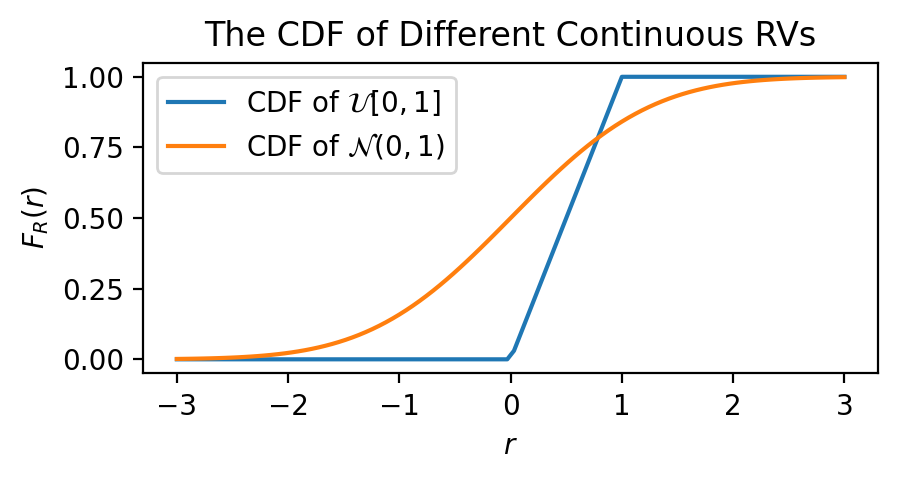

In [3]:
import numpyro
import numpyro.distributions as D

fig, ax = plt.subplots(1, 1, figsize=(4.5, 2.5))

r = jnp.linspace(-3.0, 3.0, 100)
plt.plot(r, D.Uniform().cdf(r), label=r'CDF of $\mathcal{U}[0, 1]$')
plt.plot(r, D.Normal().cdf(r), label=r'CDF of $\mathcal{N}(0, 1)$')

plt.xlabel('$r$')
plt.ylabel('$F_R(r)$')
plt.title('The CDF of Different Continuous RVs')
plt.legend()
plt.tight_layout()
plt.show()

**Probability Density Function (PDF):** We will now introduce the PDF---the "continuous RV version of the PMF"---using the CDF. To do this, we will introduce just one more fact about the CDF, that will allow us to compute the probability of a RV lying *between* two values. Suppose we have a continuous RV, $R$ with CDF $F_R(\cdot)$, then the probability that $l < R \leq u$ is given by $F_R(u) - F_R(l)$.
> Example: Suppose we want to know the probability that a patient's height is between $40$ and $60$ inches. Let's start by computing the probability that the patient's height is less than $60$ inches---but this also includes patients whose height is also less than $40$ inches (which we want to exclude from the computation). To do this, we just have to subtract the probability that their height is less than $40$ inches. This gives us $F_H(60) - F_H(40)$.

Recall that the PMF tries to tell us the probability of a random variable equaling a certain value (e.g. the probabilty that $R = r$). Since we can't compute this directly, let's set up the problem differently; specifically, let's compute the probability that $R$ lies *close to* $r$. We can do this by computing the probability that $r - \epsilon < R \leq r + \epsilon$, where $\epsilon$ is some very-small number. Using the CDF, we can compute this using:
\begin{align}
F_R(r + \epsilon) - F_R(r - \epsilon).
\end{align}

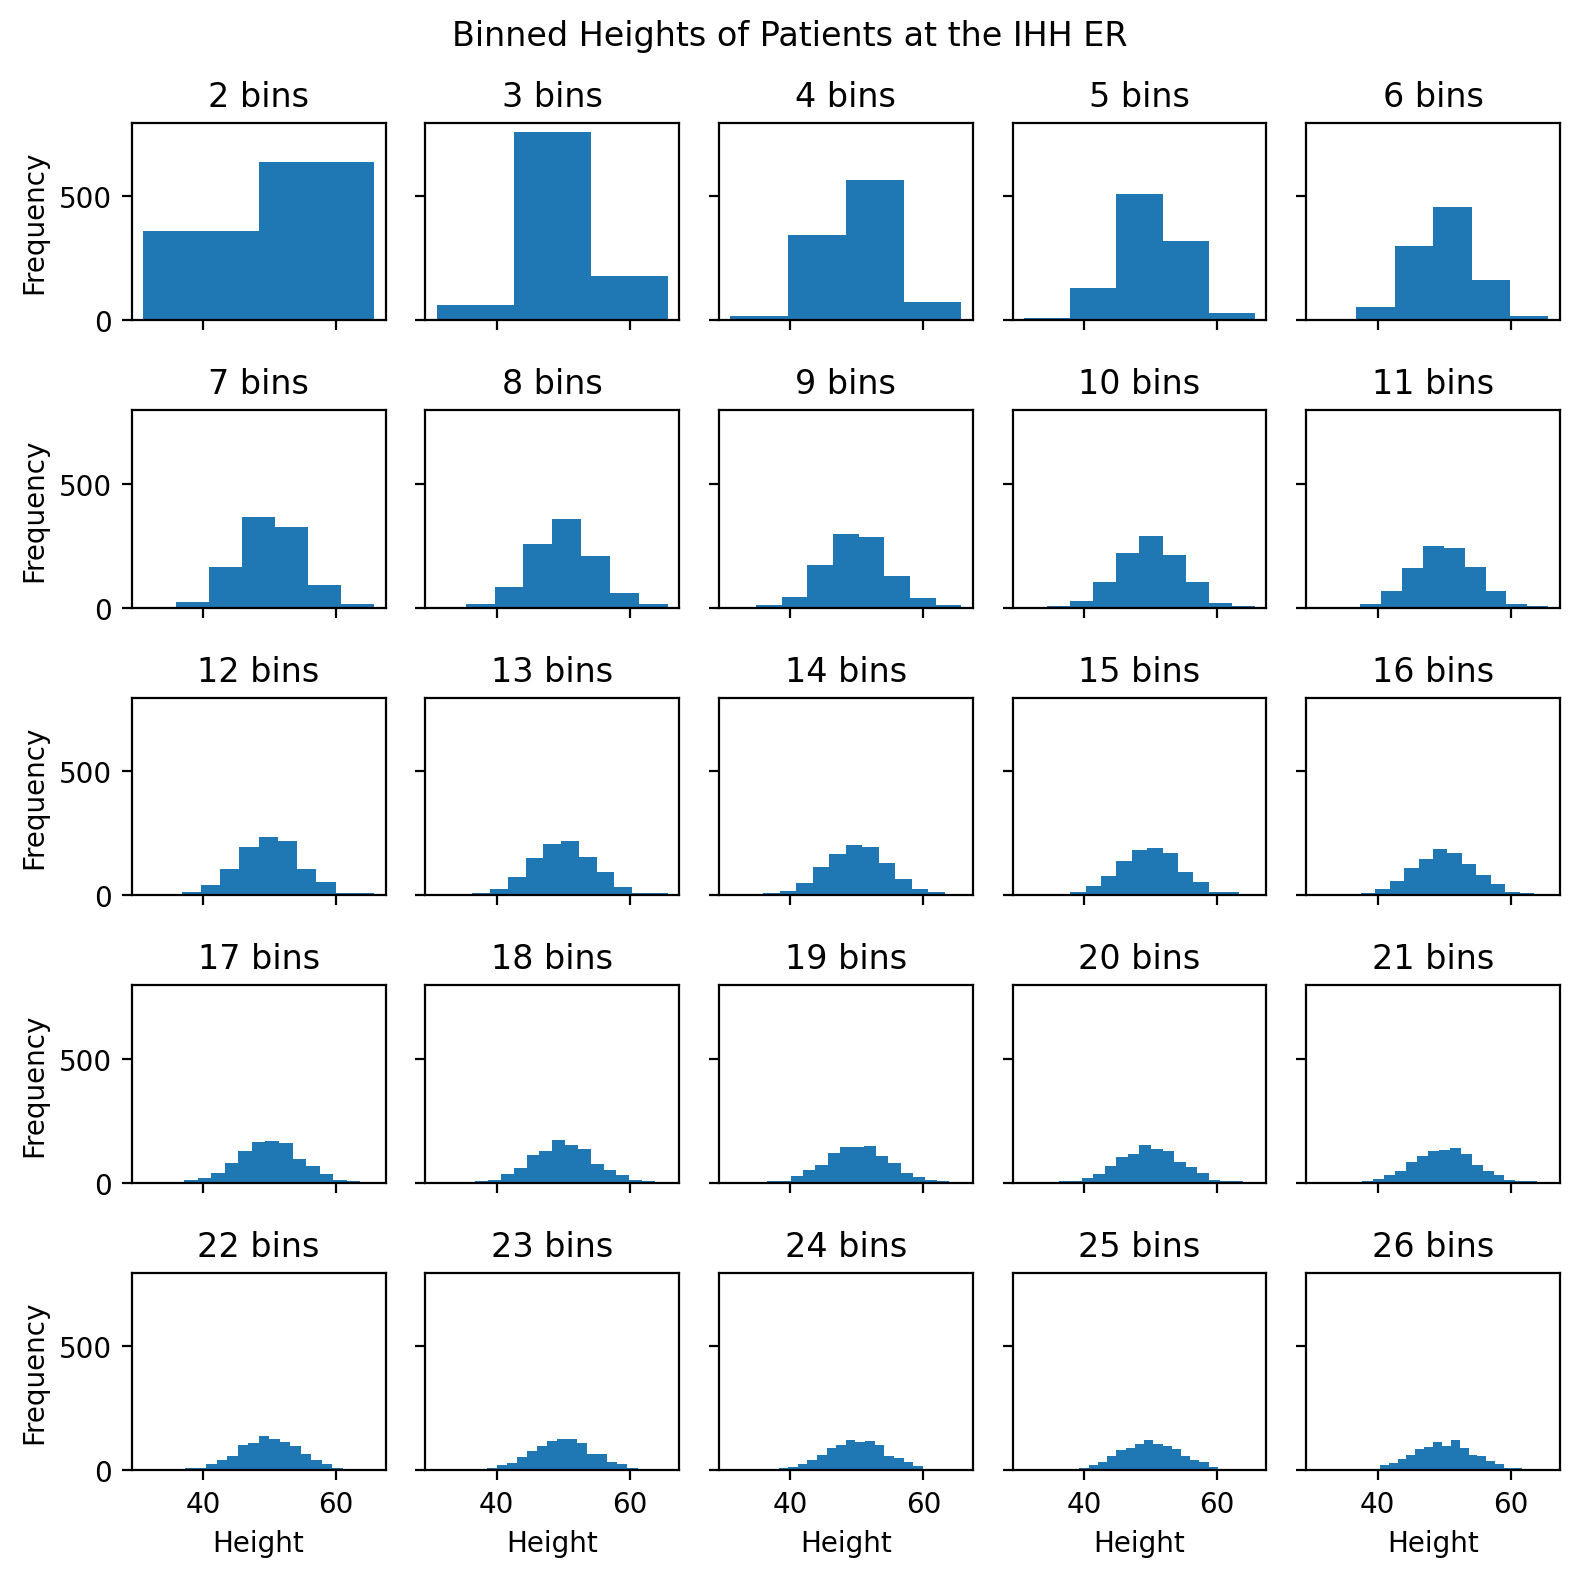

In [23]:
import jax.random as jrandom

p_H = D.Normal(50, 5)
heights = p_H.sample(jrandom.PRNGKey(seed=0), (1000,))

num_plots = 5
fig, axes = plt.subplots(num_plots, num_plots, figsize=(8, 8), sharex=True, sharey=True)
for idx, ax in enumerate(axes.flatten()):
    ax.hist(heights, bins=idx + 2)
    ax.set_title('{} bins'.format(idx + 2))
    if idx % num_plots == 0:
        ax.set_ylabel('Frequency')
    if idx >= num_plots * (num_plots - 1):
        ax.set_xlabel('Height')

plt.suptitle('Binned Heights of Patients at the IHH ER')
plt.tight_layout()
plt.show()

Now, let's take the limit as $\epsilon \rightarrow 0$ to hone in on the probability that $R = r$:
\begin{align}
p_R(r) &= \underbrace{\lim\limits_{\epsilon \rightarrow 0} \frac{F_R(r + \epsilon) - F_R(r - \epsilon)}{\epsilon}}_{\text{definition of derivative}} = \frac{d F_R(r)}{d r}.
\end{align}

The PDF has several notable properties: Let $R$ be a continuous RV with PDF $p_R(\cdot)$, defined on the sample-space $S$.
1. *The PDF must integrate to 1.* That is, $\int\limits_{r \in S} p_R(r) = 1$. This is analogous to the fact that discrete probabilities must sum to 1.
  > Example: If $R$ is drawn from a Normal distribution, then our sample space is $S = (-\infty, \infty)$. We must therefore have that $\int\limits_{r \in S} p_R(r) = 1$. 

2. *The PDF can be greater than 1.* This is in contrast to discrete probability, in which the PMF can never be greater than 1.
> Example: Examine the plot of the PDF of the normal distribution (with parameters of $\mu = 0$ and $\sigma^2 = 0.01$). Notice that it rises above 1. 

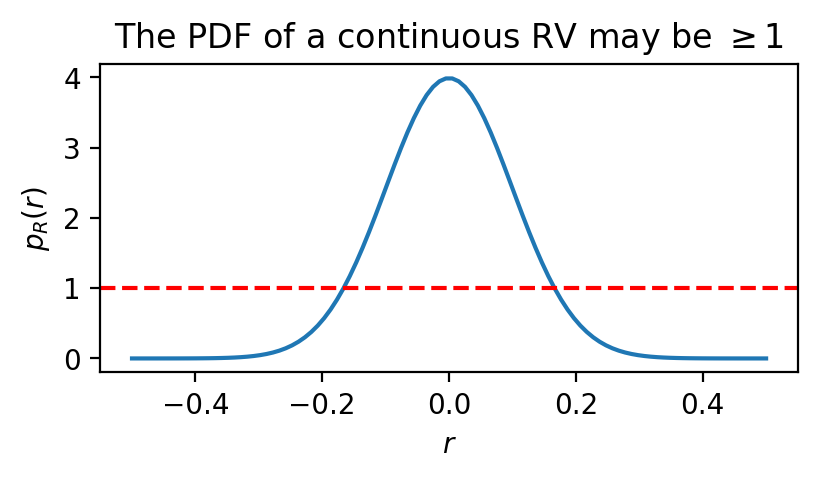

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 2))

r = jnp.linspace(-0.5, 0.5, 100)
plt.plot(r, jnp.exp(D.Normal(0.0, 0.1).log_prob(r)))
plt.axhline(1.0, color='red', ls='--')

plt.xlabel(r'$r$')
plt.ylabel(r'$p_R(r)$')
plt.title(r'The PDF of a continuous RV may be $\geq 1$')
plt.show()

```{admonition} Exercise: Gaining comfort with commonly-used continuous distributions
Browse the Wikipedia pages for the following distributions:
* [Uniform](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)
* [Beta](https://en.wikipedia.org/wiki/Beta_distribution)
* [Normal (or Gaussian)](https://en.wikipedia.org/wiki/Normal_distribution)
* [Truncated Normal](https://en.wikipedia.org/wiki/Truncated_normal_distribution)
* [Laplace](https://en.wikipedia.org/wiki/Laplace_distribution)

**Part 1:** For each of the distributions above, plot its PDF. Play with the parameters of each distribution---how does each affect the shape of the distribution? Summarize what you learn.

**Part 2:** Answer the following questions:
1. You're modeling the distribution of heights in the US. Which of the above distributions would you choose and why?
2. You have a large collection of antique coins. Unlike modern-day coins, your coins don't have a 50% probability of landing heads. You're interested in modeling the distribution of the probability of them landing heads. That is, each coin has a different probability of landing heads---you want to model the distribution of these probabilities. Which of the above distributions would you choose and why?
3. You've been given a prototype of a new sensor that determines the location of the nearest intergalactic being. The sensor is, on average, correct, but is typically a little off (sometimes it overshoots and sometimes it undershoots the location). Which of the above distributions would you use to describe the error and why?

*Hint: On each Wikipedia page, there's a panel on the right side that summarizes the properties of the distribution (e.g. its support, PDF, example plots, etc.)---all of the information you need is there.*
```

## MLE for Discrete-Continuous Models

You've recently been contacted by researchers at the IHH's Center for Telekinesis Research (CTR). The researchers at the IHH's CTR study the propensity of intergalactic beings for telekinesis---the ability of moving physical objects with their mind (how cool!). At the moment, they are interested in understanding how different physiological conditions affect a being's telekinetic abilities (measured as a real number, with larger numbers indicating heightened telekinetic abilities). They have collected the following data sets and would like your help in analyzing it. Let's load it and have a look!

In [5]:
# Import a bunch of libraries we'll be using below
import pandas as pd
import matplotlib.pylab as plt
import numpyro
import numpyro.distributions as D

# Load the data into a pandas dataframe
csv_fname = 'data/IHH-CTR.csv'
data = pd.read_csv(csv_fname, index_col='Patient ID')

# Print a random sample of patients, just to see what's in the data
data.sample(15, random_state=0)

,Condition,Telekinetic-Ability
Patient ID,,
398,Allergic Reaction,0.510423
3833,Allergic Reaction,0.479960
4836,Intoxication,2.043218
4572,Allergic Reaction,-0.443333
636,Intoxication,1.423190
2545,Intoxication,1.392568
1161,Intoxication,2.110151
2230,Intoxication,2.102866
148,Intoxication,1.865081


```{admonition} Exercise: Modeling Data from the IHH's Center for Telekinesis Research
Let $C$ and $A$ denote the RVs representing "Condition" and "Telekinetic-Ability," respectively. Your goal is to learn a generative model (i.e. a joint distribution) of $A$ and $C$.

**Part 1:** Let's first perform an exploratory data analysis. 
* Visualize the marginals, $p_C(\cdot)$ and $p_A(\cdot)$.
* Visualize the conditional $p_{A | C}(\cdot | c)$ for every value of $c$. 
* Can you visualize $p_{C | A}(c | a)$? Explain.

**Part 2:** Based on the visualizations, which of the following factorizations of the joint would you prefer to use? And which distributions would you use for each component in the factorization? Explain.
\begin{align*}
p_{A, C}(a, c) &= p_{A | C}(a | c) \cdot p_C(c) \quad \text{(Option 1)} \\
p_{A, C}(a, c) &= p_{C | A}(c | a) \cdot p_A(a) \quad \text{(Option 2)}
\end{align*}
*Hint: Think of which of the distributions already covered in the course would you use for each component of the joint distribution.*

**Part 3:** Draw a directed graphical model for the joint data likelihood. Write down the log of the joint data likelihood (the joint probability of all $N$ observations). Both should explicitly depict the parameters of the model that you'd like to learn.

**Part 4:** Implement your model in `NumPyro`. Perform the MLE on your model.

**Part 5:** Verify your model learned the data distribution well by plotting each component of your joint distribution against the empirical distribution of the data.

**Part 6:** Help the researchers interpret your fitted model. Which conditions hinder telekinetic ability, and which enhance it? How can you tell?
```